# Naive Machine Translation and Locality Sensitive Hashing

This notebook cover machine  translation system and see how LSH works and build our own machine translation algorithm.

## 1. English and French word Embedding
We'll use english word embendding from [GoogleNews-vectors-negative300.bin.gz](https://code.google.com/archive/p/word2vec/) through manual downloading.

And French word embeddings from [French_embeddings](https://github.com/vjstark/crosslingual_text_classification) through terminal command:
``` bash
curl -o ./wiki.multi.fr.vec https://dl.fbaipublicfiles.com/arrival/vectors/wiki.multi.fr.vec
```

In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
# importing necessary libraries
import pickle
import numpy as np
from scipy.spatial.distance import cosine
from utils import *
from translator import *
import matplotlib.pyplot as plt

### Loading and Processing Dataset
The dataset is processed using `dataset_preprocess()` function implemented in `utils.py`. Then cleaned dataset stored as pickle file for each english word embeddings, `en_embeddings` and french word embedding, `fr_embeddings`

In [3]:
# preprocess dataset
dataset_preprocess()

In [5]:
# Loading cleaned dataset 
en_embeddings = pickle.load(open("en_embeddings.p", "rb"))
fr_embeddings = pickle.load(open("fr_embeddings.p", "rb"))

In [6]:
# exploaring english embeddings, as a dictionary with array of numbers of 300 multidimention as values
print(f'''{type(en_embeddings)}
{en_embeddings['the'].shape}''')

<class 'dict'>
(300,)


In [7]:
print(type(fr_embeddings['la']))

<class 'numpy.ndarray'>


Now let load a dictionary that maps english -> french data from text file `en-fr.trainxt`

In [54]:
# loading the english to french dictionaries
en_fr_train = get_dict('data/en-fr.train.txt')
en_fr_test = get_dict('data/en-fr.test.txt')

In [55]:
# print first 5 dictionary mapps
i = 0
for row  in en_fr_train.items():
    if i > 5:
        break
    i += 1
    print(row)

('the', 'la')
('and', 'et')
('was', 'était')
('for', 'pour')
('that', 'cela')
('with', 'avec')


#### Translating English dictionary to French by using embeddings

Now we will implement a function `get_matrices`, which takes the loaded data
and returns matrices `X` and `Y`.

Inputs:
- `en_fr` : English to French dictionary
- `en_embeddings` : English to embeddings dictionary
- `fr_embeddings` : French to embeddings dictionary

Returns:
- Matrix `X` and matrix `Y`, where each row in X is the word embedding for an
english word, and the same row in Y is the word embedding for the French
version of that English word.

In [10]:
# getting the training set:
X_train, Y_train = get_matrices(
    en_fr_train, fr_embeddings, en_embeddings)

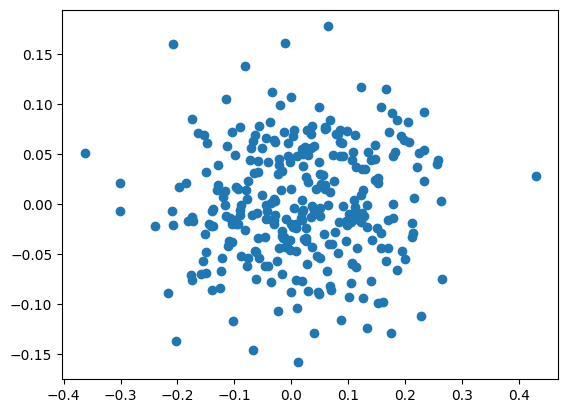

In [11]:
plt.scatter(X_train[1], Y_train[1])

### Training
Now let train the model to obtain the optimal value R_train for the prediction. This needs $500$ iterations and learning rate of $0.8$

In [39]:
R_train = align_embeddings(X_train, Y_train, train_steps=500, learning_rate=0.8)

loss at iteration 0 is: 963.0146
loss at iteration 25 is: 97.8292
loss at iteration 50 is: 26.8329
loss at iteration 75 is: 9.7893
loss at iteration 100 is: 4.3776
loss at iteration 125 is: 2.3281
loss at iteration 150 is: 1.4480
loss at iteration 175 is: 1.0338
loss at iteration 200 is: 0.8251
loss at iteration 225 is: 0.7145
loss at iteration 250 is: 0.6534
loss at iteration 275 is: 0.6185
loss at iteration 300 is: 0.5981
loss at iteration 325 is: 0.5858
loss at iteration 350 is: 0.5782
loss at iteration 375 is: 0.5735
loss at iteration 400 is: 0.5705
loss at iteration 425 is: 0.5686
loss at iteration 450 is: 0.5673
loss at iteration 475 is: 0.5665


### Evaluation
We'll generate the evaluationa data `X_val` and `Y_val` to measure the accuracy of the model

In [50]:
# Evaluation data metrices
X_val, Y_val = get_matrices(en_fr_test, fr_embeddings, en_embeddings)

In [51]:
print(f'Accuracy: {test_vocabulary(X_val, Y_val, R_train)}')

Accuracy: 0.5570236439499304


In [52]:
# Combining the parameters and correspondind embendings
weight = (R_train, en_embeddings, fr_embeddings)

### Prediction customer words
Now enter any English to translate to French

In [53]:
e_word = 'weight'
translate(weight, e_word)

English: weight --> French: poids
